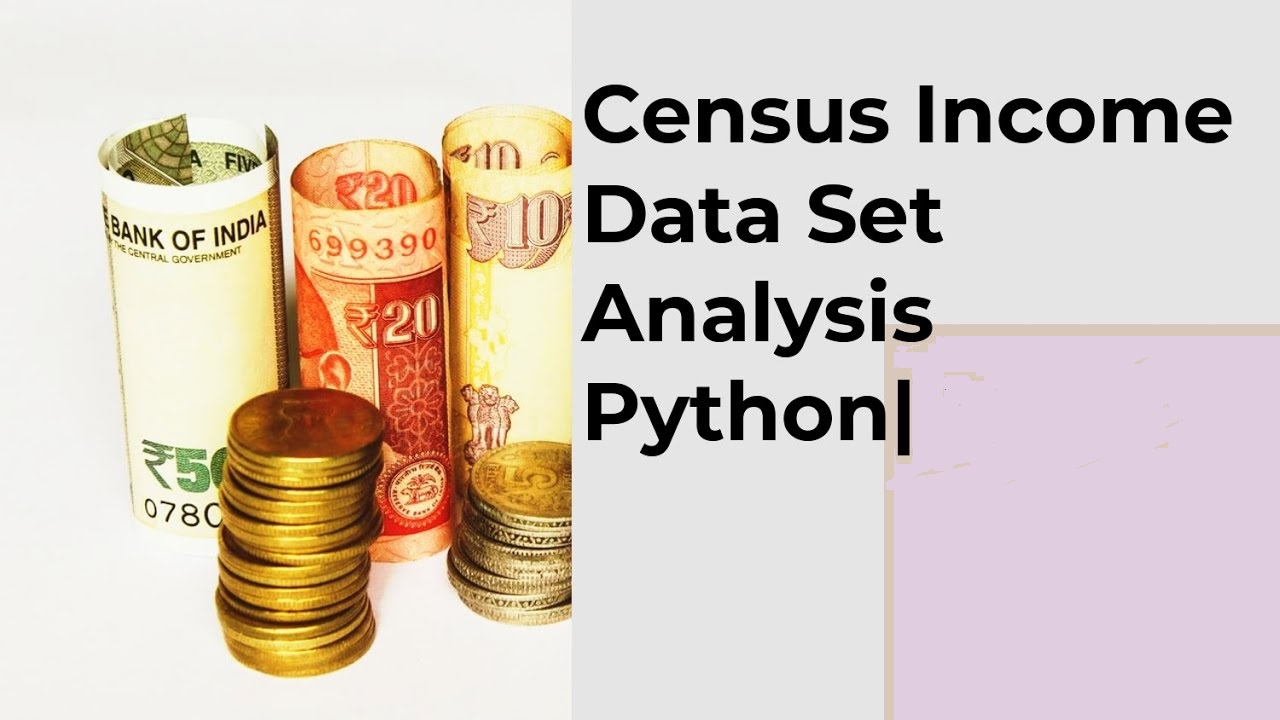

## 1.1 Problem Statement :
   ###### The economic well-being of a Nation is highly driven by the income of the residents.

    Countless decisions in private and public sectors are based on Census data. Census data is the backbone of the democratic system of government, highly affecting the economic sectors. Census-related figures are used to distribute the federal funding by the government into different states and localities.

    Not only the above, the census data is also used for post census population estimates and projections, economic and social science research, and many other such applications. Hence, the importance of this data and its correct predictions is very clear to us.

    The above introduction had an aim to increase the awareness about how the income factor actually has an impact not only on the personal lives of people, but also an impact on the nation and its betterment. We will today have a look on the data extracted from the 1994 Census bureau database, and try to find insights about how different features have an impact on the income of an individual. Though the data is quite old, and the insights drawn cannot be directly used for derivation in the modern world, but it would surely help us to analyze what role different features play in predicting the income of an individual.

## 2. DataSet Source:
You can go to Main DataSet Web Page by clicking on below Link :-
https://archive.ics.uci.edu/ml/datasets/Census+Income

or You can Search on the Web UCI Machine Learning Repository , here you can find many Dataset for your Future Reference

## 3. Information about the Features of the Dataset

1. Age           :  Continuous.
2. Workclass     :  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt        :  continuous.
4. Education     :  Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,1st-                    4th,10th, Doctorate, 5th-6th, Preschool.
5. Education-num :  continuous.
6. Marital-Status:  Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. Occupation    :  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,                          Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-                    Forces.
8. Relationship  :  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. Race          :  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. Sex           :  Female, Male.
11. Capital-Gain  :  continuous.
12. Capital-Loss  :  continuous.
13. Hours-Per-Week:  continuous.
14. Native-Country:  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                      Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                    Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                    Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


#### Description of fnlwgt (final weight)

 The weights on the CPS files are controlled to independent estimates of the
 civilian noninstitutional population of the US.  These are prepared monthly
 for US by Population Division here at the Census Bureau.  We use 3 sets of
 controls.
  These are:
- 1.  A single cell estimate of the population 16+ for each state.
- 2.  Controls for Hispanic Origin by age and sex.
- 3.  Controls by Race, age and sex.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
og_DB=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",delimiter=",",names=['age' ,'workclass' ,'fnlwgt' ,'education' ,'education-num' ,'marital-status', 'occupation', 'relationship', 'race' ,'sex' ,'capital-gain', 'capital-loss' ,'hours-per-week' ,'native-country','Final_Conclusion'])


In [3]:
og_DB.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Final_Conclusion
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Lets Check for the DataTypes of the Feature and Null Values

In [4]:
og_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         32561 non-null  object
 2   fnlwgt            32561 non-null  int64 
 3   education         32561 non-null  object
 4   education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  native-country    32561 non-null  object
 14  Final_Conclusion  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
og_DB.shape

(32561, 15)

### All Features are Relevant as per thier Data, so need to do Anything with their Datatype. Otherwise we need to convert that.

In [6]:
og_DB.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
numerical_feature=[num for num in og_DB.columns if og_DB[num].dtype!="O"]

In [8]:
categorical_feature=[num for num in og_DB.columns if og_DB[num].dtype =="O"]

In [9]:
numerical_feature,categorical_feature

(['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country',
  'Final_Conclusion'])

#### Lets Handle the Missing Values :
- One of the Main thing while Handling Missing Keys is that there is a Possibility of Unknown Var and might be Possible that na method can't Capture those irrelevant Values that are not suitable as per their Field.
- You can make the DataFrame understand that while reading Csv (filename,na_values=["?","N/A","-",etc]

In [10]:
for col in og_DB.columns:
    print(col,og_DB[col].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-o

#### As We can see that there are several ? in most columns : -
     Now we need to Handle them with Care.
     Since in most Cases i.e. Features , there is only ? that is irrelevant present there. Now Lets find out in which Feature this symbol ? is present and how many of them are there and how can we handle without much affecting the prediction

In [11]:
# Now Lets Replace "?" with np.nan to handle those Missing Values
for col in og_DB.columns:
    og_DB[col]=og_DB[col].replace(" ?",np.nan)

In [12]:
DB_withNan=og_DB.copy()

In [13]:
a=og_DB.isnull().sum()

In [15]:
data={"Features":og_DB.columns,"Null Values":list(a)}
NullDB=pd.DataFrame(data)

In [16]:
NullDB.head()

,Features,Null Values
0,age,0
1,workclass,1836
2,fnlwgt,0
3,education,0
4,education-num,0


### Lets Draw the Graph for the NULL values

<function matplotlib.pyplot.show(close=None, block=None)>

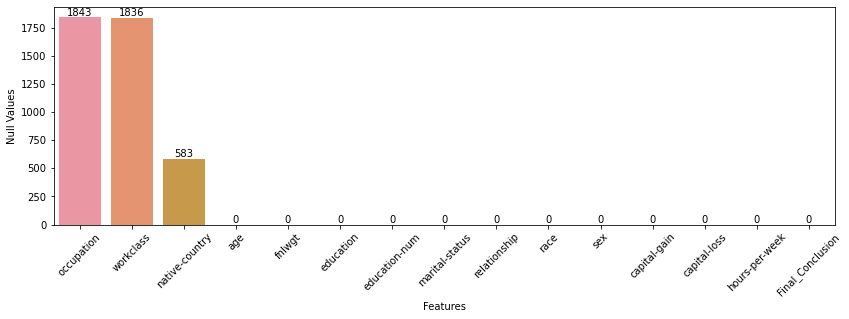

In [17]:
plt.figure(figsize=(14,4))
ax=sns.barplot(x=NullDB['Features'],y=NullDB['Null Values'],data=NullDB,order=NullDB.sort_values('Null Values',ascending=False).Features)
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show

### Lets find out the Correlation between the Features

<AxesSubplot:>

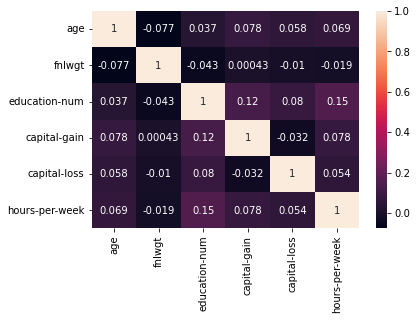

In [18]:
sns.heatmap(og_DB.corr(),annot=True)

#### What different ways can be there to Handle Missing Data?


### Lets do Random Sampling:

In [19]:
def randomSampled(col,DF):
    #First we need to get the SampleSize by the total Null Values
    randomSample=DF[col].dropna().sample(DF[col].isnull().sum())
    #Now find the Index of Null values
    randomSample.index=og_DB[og_DB[col].isnull()].index
    #Now replace the null val of Dataframe with the Random Sample
    DF[col].loc[DF[col].isnull()]=randomSample
    

In [20]:
for col in og_DB.columns:
    if og_DB[col].isnull().sum()>0:
#         random=og_DB[col].dropna().sample(og_DB[col].isnull().sum())
# #         print(random)
#         print(og_DB[og_DB[col].isnull()].index)
        randomSampled(col,og_DB)
    
        

In [21]:
og_DB.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
Final_Conclusion    0
dtype: int64

In [22]:
# EDA Related, what you can do?
# 1. Check for Capital gain vs Occupation and Capital Loss vs occupation : 
# 2. Hours Per Week vs Workclass and hue by Conclusion and HpW vs Relationship and Hue by Sex
# 3. Capital Loss vs Marital Status 
# 4. Country vs Workclass : Insight which country has the Most Risk Taker or comfortable in making a Business.
# 5. Draw barGraph for those People EMployed > 50 K on the Basis of Race and Again draw barGraph for 
#    those People EMployed > 50 K on the Basis of Race.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

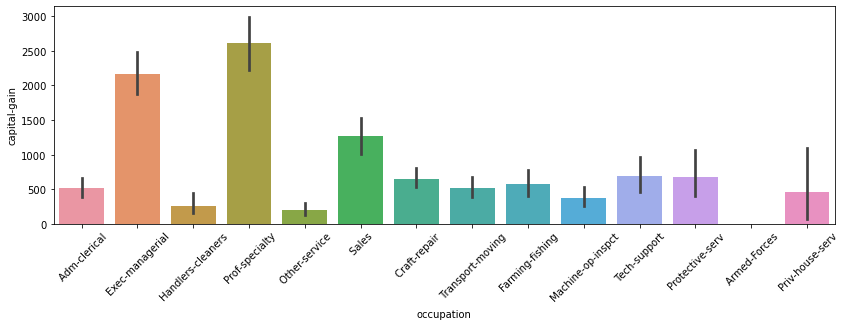

In [23]:
# Capital Gain vs Occupation 
plt.figure(figsize=(14,4))
ax=sns.barplot(x=og_DB['occupation'],y=og_DB['capital-gain'],data=og_DB)
plt.xticks(rotation=45)


# og_DB.sort_values('capital-gain').occupation
# Above Code is Working Fine 
# ax=sns.barplot(x=og_DB['occupation'],y=og_DB['capital-gain'],data=og_DB,order=og_DB.sort_values('capital-gain').occupation)
#But this above code goes into Loop ? WHy?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

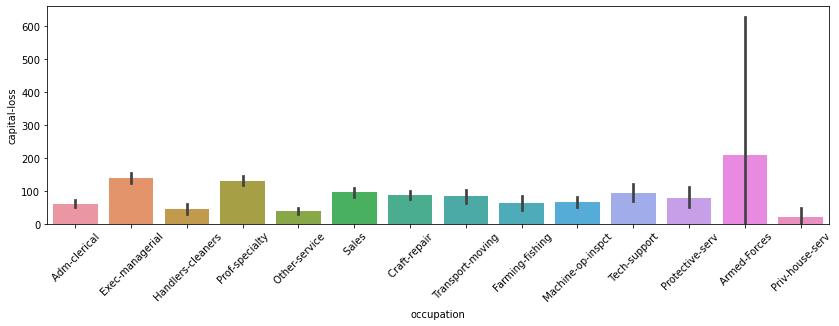

In [24]:
# Capital Loss vs Occupation 
plt.figure(figsize=(14,4))
ax=sns.barplot(x=og_DB['occupation'],y=og_DB['capital-loss'],data=og_DB)
plt.xticks(rotation=45)

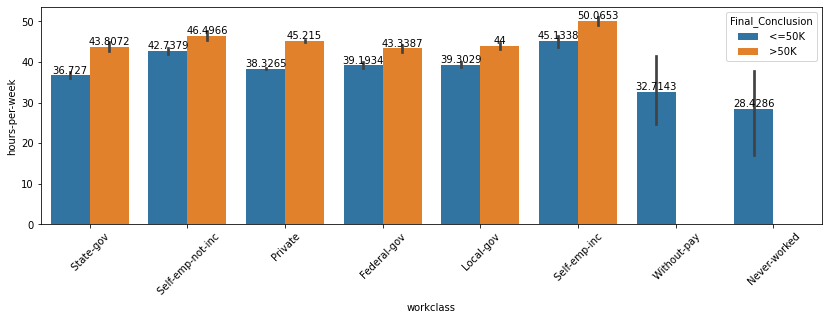

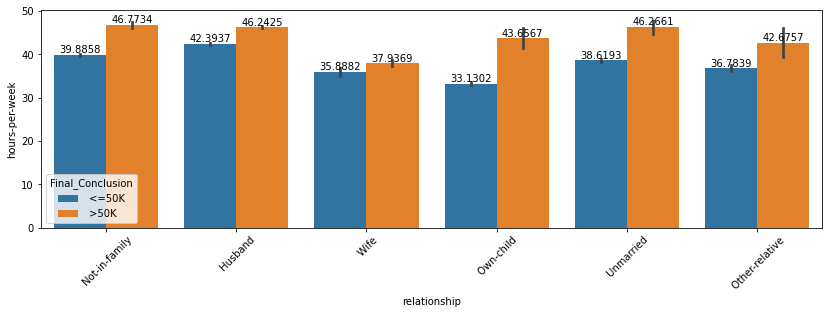

In [25]:
# Hours Per Week vs Workclass and hue by Conclusion and HpW vs Relationship and Hue by Sex
plt.figure(figsize=(14,4))
ax=sns.barplot(x=og_DB['workclass'],y=og_DB['hours-per-week'],data=og_DB,hue='Final_Conclusion')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)

plt.figure(figsize=(14,4))
ax=sns.barplot(x=og_DB['relationship'],y=og_DB['hours-per-week'],data=og_DB,hue='Final_Conclusion')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
#,order=og_DB.sort_values('hours-per-week').workclass

In [26]:
df_plo=pd.DataFrame(og_DB[['capital-loss','marital-status']])

In [27]:
# og_DB[['capital-loss','marital-status']].plot(kind='bar',stacked=True, title='Stacked Bar plot')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Never-married'),
  Text(1, 0, ' Married-civ-spouse'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Married-spouse-absent'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

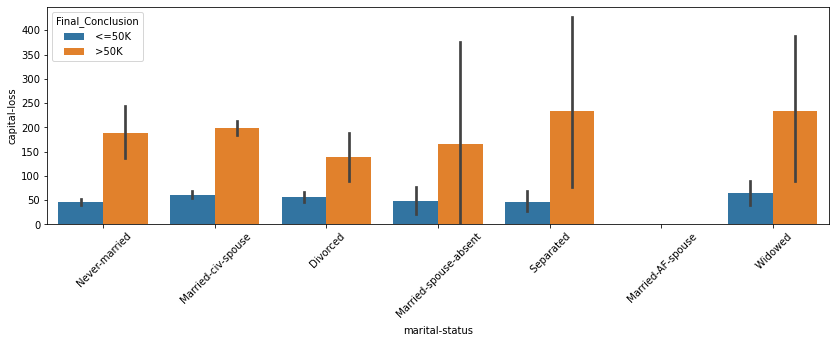

In [28]:
plt.figure(figsize=(14,4))
ax=sns.barplot(y=og_DB['capital-loss'],x=og_DB['marital-status'],data=og_DB,hue='Final_Conclusion')

plt.xticks(rotation=45)
# for container in ax.containers:
#     ax.bar_label(container)

In [29]:
#  Country vs Workclass
# plt.figure(figsize=(14,4))
# ax=sns.barplot(y=og_DB['workclass'],x=og_DB['native-country'],data=og_DB,hue='Final_Conclusion')
# plt.xticks(rotation=45)
country_comparison=og_DB['native-country'].value_counts()[:8]


#### Now Lets find insight capital vs workclass vs Countries Multivariate analysis

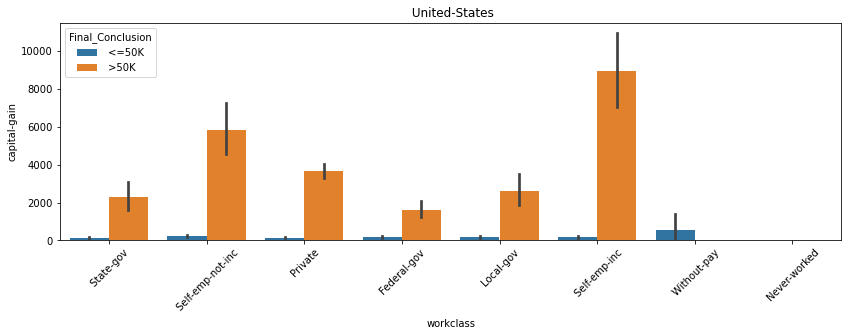

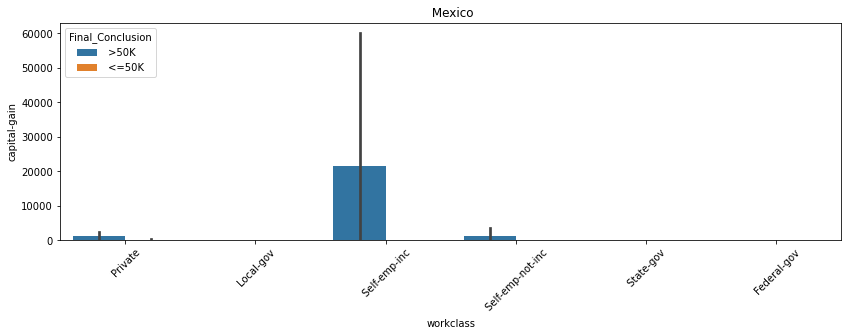

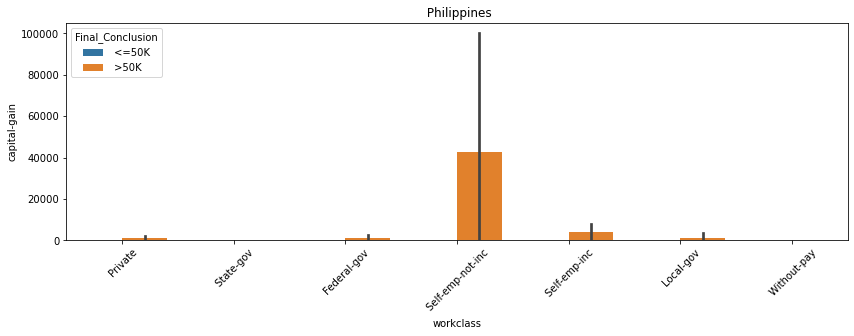

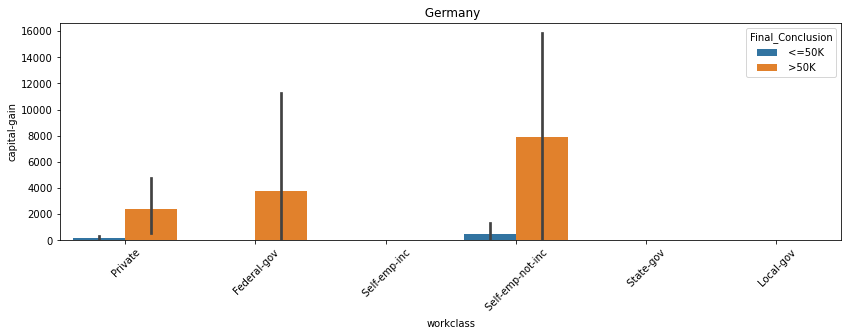

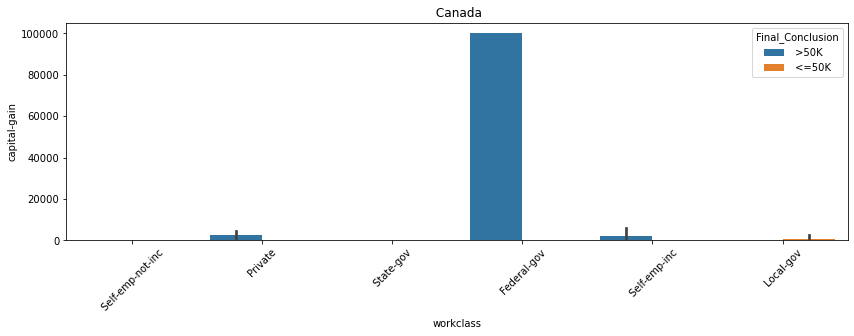

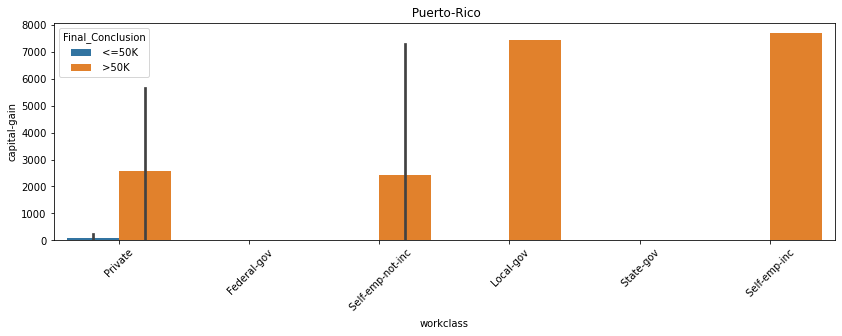

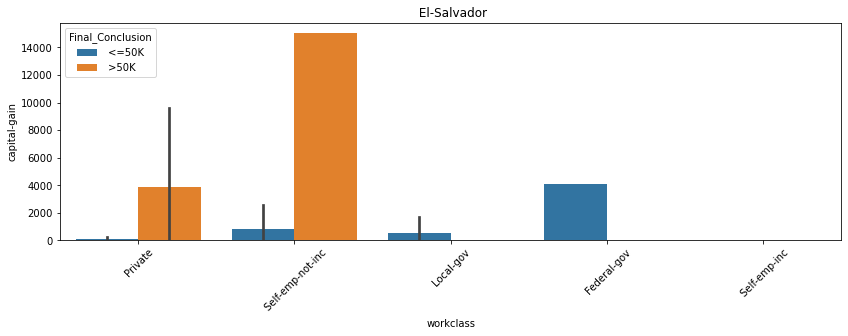

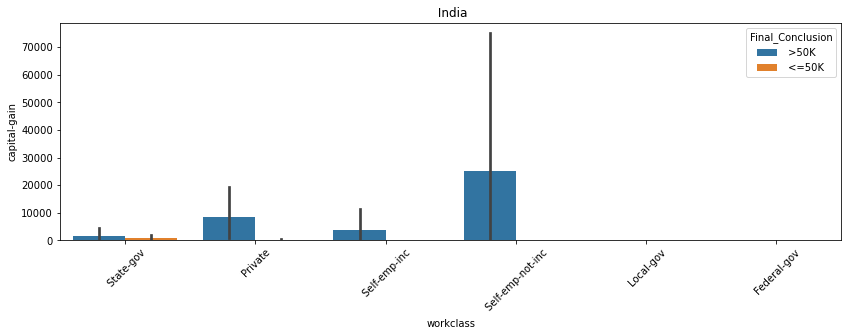

In [31]:
for i in country_comparison.keys():
    d=og_DB[og_DB['native-country']==i]
    plt.figure(figsize=(14,4))
    ax=sns.barplot(y=d['capital-gain'],x=d['workclass'],data=d,hue='Final_Conclusion')
    plt.xticks(rotation=45)
    plt.title(i)

#### Here , we can see how for Different countries differnet Capital gain for all workclass , one thing to be concluded, there almost no capital gain for the Individual that earned less than 50K , they have almost No capital gain or negligible gain.

# Conlusion

1. We can conclude from the Above Analysis that in terms of Reationship that Wife and Own-child Employee not able to give more time to Work 
    in comparison with Single Individual and Husband.
2. And from Workclass Attribute , we can said that Self-Emp notinc and incorpo. are the Most Hardworking whether they earn less or more 
    than 50 K. And all the Government related worker give less number of hours.
3. For Different countries differnet Capital gain for all workclass , one thing to be concluded, there almost no capital gain for the    Individual that earned less than 50K , they have almost No capital gain or negligible gain.
